# Modelling count data using the Poisson distribution

本节需要的包：

In [1]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## The nature of count data

在很多研究中变量将是一个计数。

在统计的说法，一个计数变量是离散变量的一个例子，因为它可以是离散的值分开。(相比之下，一个变量正态分布是一个连续变量，因为如果可以带任何值连续)。

In this course we shall encounter three types of count data:

- Counts of the number of “events” occurring. “事件”发生的次数
  
  where ideally, the events occur independently of one another and with no specific upper limit on the maximum number. 其中，在理想情况下，事件的发生是相互独立的，并且没有对最大数量的具体上限。

- Counts of the number of “successes” from a fixed number of trials. 从固定数量的试验中计算出 "成功 "的数量

  E.g., the number of Heads from tossing a coin 10 times. In this case, the response variable y is the proportion of successes.

- Counts of the number of items in a category. 一个类别中的项目数的计数

  E.g., The count of A, B, and C grades in the course.

## Number of R packages submitted to the Comprehensive R Archive Network (CRAN)

In the following example we will model a count variable (number of R packages submitted to the CRAN over the years) using what we know to date: the linear model via the function `lm()`.

我们将把它与一种更普遍、更合适的计数建模方式进行对比：通过函数的广义线性模型（GLM）`glm()`。

In [4]:
CRAN.df <- read.table("../data/CRAN.txt", header = T)
CRAN.df


Year,Number
<int>,<int>
2005,1
2006,4
2007,2
2008,10
2009,32
2010,44
2011,89
2012,594
2013,830


Let's plotting the data

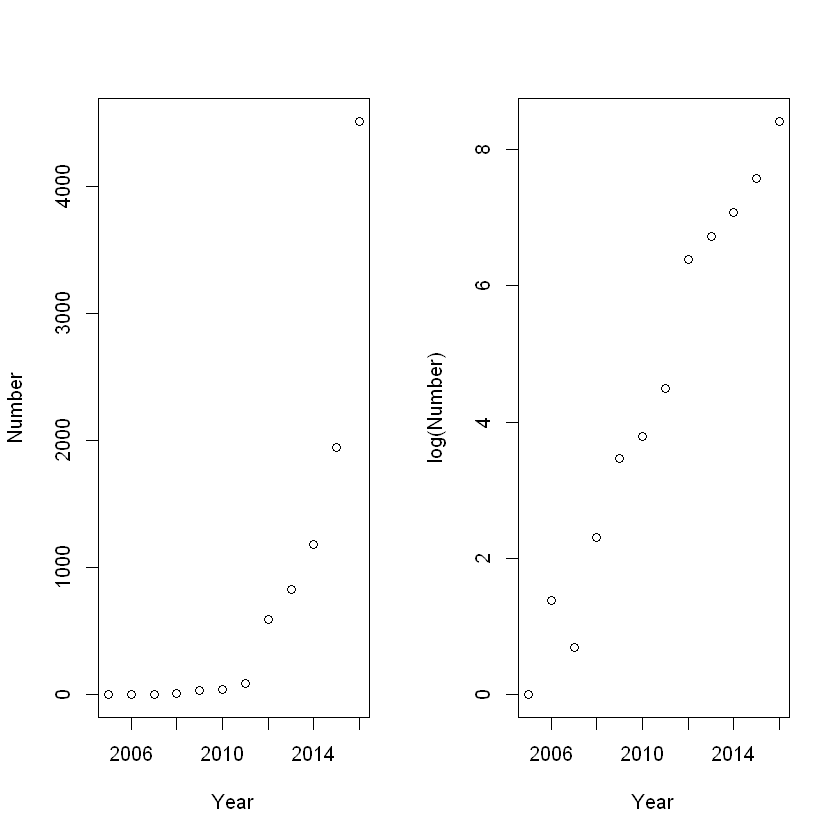

In [5]:
## One-by-two figure layout
par(mfrow = c(1, 2))
## Scatter plot using raw y
plot(Number ~ Year, data = CRAN.df)
## Scatter plot using log y
plot(log(Number) ~ Year, data = CRAN.df)


The relationship between year and number of submissions looks reasonably linear on the log scale, so we’ll fit a linear model to `log(Y)`.

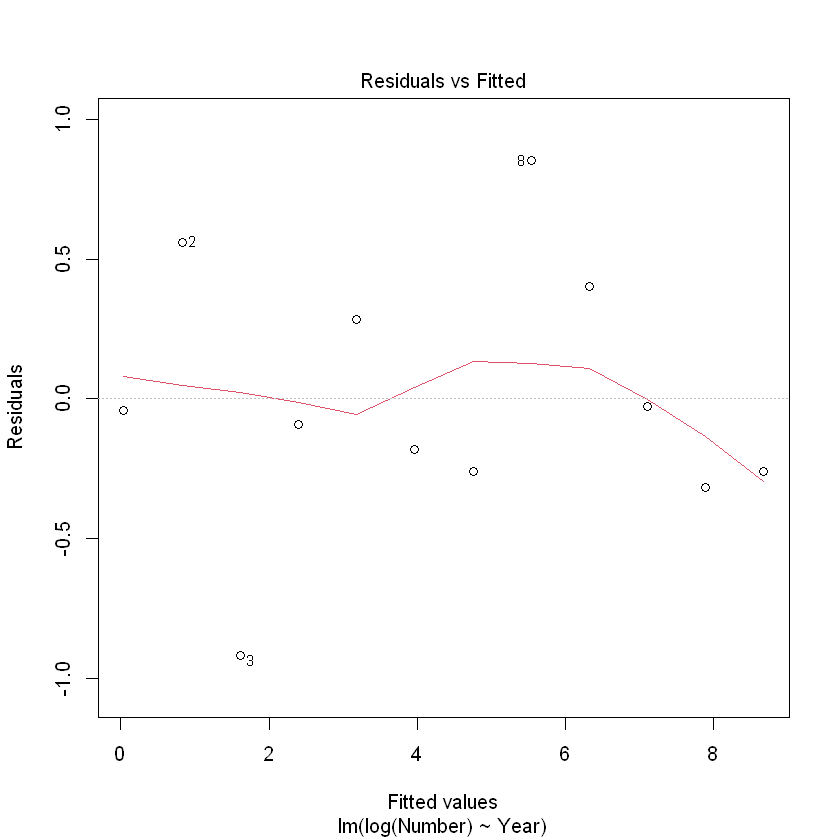

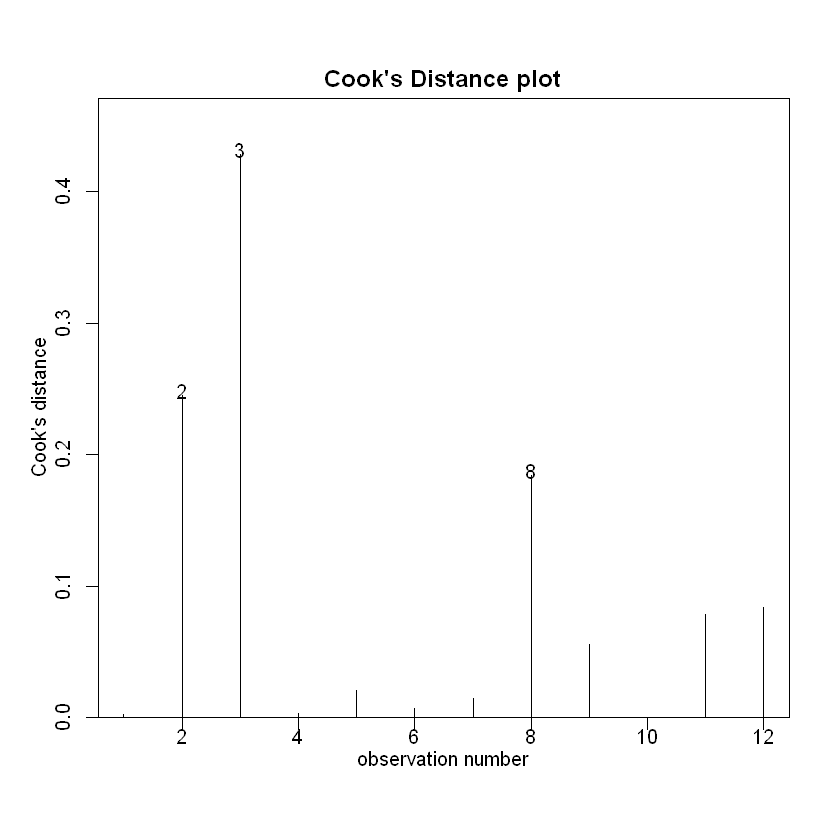

In [7]:
CRAN.fit <- lm(log(Number) ~ Year, data = CRAN.df)
plot(CRAN.fit, which = 1)
# 还有一句被我吞了，我说的
cooks20x(CRAN.fit)


The Cook’s distance for observation 3 exceeds our threshold of 0.4. However, with only 12 observations this is perhaps not of great concern. 观察3的库克距离超过了我们的阈值0.4。然而，由于只有12个观测值，这也许并不值得关注。

In [8]:
summary(CRAN.fit)



Call:
lm(formula = log(Number) ~ Year, data = CRAN.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9174 -0.2607 -0.0668  0.3143  0.8517 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.574e+03  8.245e+01  -19.09 3.39e-09 ***
Year         7.849e-01  4.101e-02   19.14 3.30e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4904 on 10 degrees of freedom
Multiple R-squared:  0.9734,	Adjusted R-squared:  0.9708 
F-statistic: 366.4 on 1 and 10 DF,  p-value: 3.295e-09


Back-transform to get the multiplicative effect of year.

In [9]:
## Estimated annual multiplier
exp(CRAN.fit$coef["Year"])
## Confidence interval
exp(confint(CRAN.fit))


Year 
2.192237

,2.5 %,97.5 %
(Intercept),0.00000,0.00000
Year,2.00081,2.40198


So, the Executive Summary would have said that the median annual number of submissions to CRAN multiplies by between 2.00 to 2.40 times each year. In other words, it increases by between 100% and 140% per annum. 因此，执行摘要替代，每年提交给CRAN的中位数是2.00到2.40倍之间。换句话说，它每年增加 100% 到 140% 之间。

In [10]:
predCRAN.df <- data.frame(Year = 2017)
pred2017 = predict(CRAN.fit, predCRAN.df, interval = "confidence")
## Prediction on the log scale
## Back-transform for the median of the number of submissions in 2017
exp(pred2017)


,fit,lwr,upr
1,12833.05,6550.586,25140.85


So, the Executive Summary would have said that the median of the number of submissions to CRAN in 2017 is between 6550 and 25100.

## The Poisson Distribution

The Poisson is a distribution that takes values on the non-negative { 0,1,2,3,... } integers and it has no upper limit. 泊松是一种在非负{0,1,2,3，…}整数上取值的分布，它没有上限。

The probability that the non-negative integer value y will be observed if generated by a Pois(μ) distribution is given by the following formula 如果由POIS(μ)分布生成，则观察到非负整数值y的概率由以下公式给出:

$$
\text{Pr}(y)=\frac{\exp(-\mu)\mu^y}{y!}
$$

where $y!=\operatorname{factorial(y)} =1\times2\times...\times\bigl(y-1\bigr)\times y\bigl(\text{and}\ 0!=1\bigr)$

For y = 12 and μ = 9.61, this could be calculated in using the code:

In [11]:
y <- 12
mu <- 9.61
(exp(-mu) * mu^y) / factorial(y)


[1] 0.08685078